#Question 1: What is Simple Linear Regression?

##Answer:
Simple Linear Regression is a statistical method used to study the relationship between two variables: one independent (predictor) variable and one dependent (outcome) variable. It models this relationship with a straight line:

𝑌 = 𝛽0+𝛽1𝑋+𝜖

Where:

*   Y: dependent variable

*   X: independent variable

*   β0: intercept

*   β1: slope

*   ϵ: error term

#Question 2: What are the key assumptions of Simple Linear Regression?


Answer:


1.   Linearity – The relationship between X and Y is linear.

2.   Independence – Observations are independent of each other.

3.   Homoscedasticity – Constant variance of residuals (errors).

4.   Normality of errors – Residuals follow a normal distribution.

5.   No multicollinearity – (relevant in multiple regression).

#Question 3: What is heteroscedasticity, and why is it important to address in regression models?

Answer:

Heteroscedasticity occurs when the variance of residuals (errors) is not constant across values of the independent variable(s).

It is important because it Violates regression assumption of homoscedasticity.

It Leads to inefficient estimates and unreliable hypothesis tests (p-values, confidence intervals).


#Question 4: What is Multiple Linear Regression?

Multiple Linear Regression is an extension of simple linear regression that models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ).

###𝑌=𝛽0+𝛽1𝑋1+𝛽2𝑋2+⋯+𝛽𝑛𝑋𝑛+𝜖

It helps capture more complex relationships compared to a single predictor.

#Question 5: What is polynomial regression, and how does it differ from linear regression?

Answer:

Polynomial Regression is a type of regression where the relationship between X and Y is modeled as an nth-degree polynomial:

###𝑌=𝛽0+𝛽1𝑋+𝛽2𝑋2+⋯+𝛽𝑛𝑋𝑛+𝜖

##Difference from Linear Regression:

*   Linear regression fits a straight line.

*   Polynomial regression fits a curved line (still linear in terms of coefficients).

#Question 6: Implement a Python program to fit a Simple Linear Regression model to the following sample data:

`● X = [1, 2, 3, 4, 5]`

`● Y = [2.1, 4.3, 6.1, 7.9, 10.2]`

#Plot the regression line over the data points.
(Include your Python code and output in the code box below.)

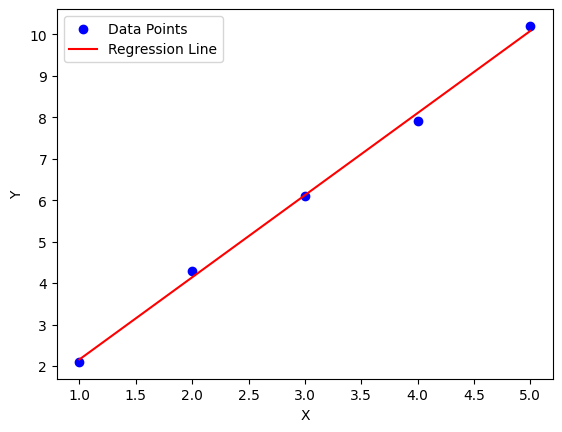

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Fit model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


#Question 7: Fit a Multiple Linear Regression model on this sample data:

`● Area = [1200, 1500, 1800, 2000]`

`● Rooms = [2, 3, 3, 4]`

`● Price = [250000, 300000, 320000, 370000]`

#Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Data
Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

X = pd.DataFrame({'Area': Area, 'Rooms': Rooms})
y = np.array(Price)

# Standardize features (important for Ridge/Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Ridge regression (alpha controls regularization strength)
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)

# Predictions
y_pred = ridge.predict(X_scaled)

print("Intercept:", ridge.intercept_)
print("Coefficients:", ridge.coef_)
print("Predicted Prices:", y_pred)


Intercept: 310000.0
Coefficients: [18778.9651171  19922.41846932]
Predicted Prices: [255494.77566073 302255.68531039 320842.04056546 361407.49846343]


#Question 8: Implement polynomial regression on the following data:

`● X = [1, 2, 3, 4, 5]`

`● Y = [2.2, 4.8, 7.5, 11.2, 14.7]`

#Fit a 2nd-degree polynomial and plot the resulting curve.
# (Include your Python code and output in the code box below.)

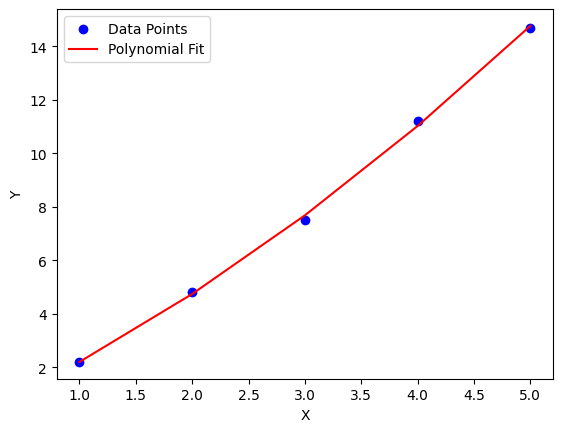

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


#Question 9: Create a residuals plot for a regression model trained on this data:

`● X = [10, 20, 30, 40, 50]`
`● Y = [15, 35, 40, 50, 65]`

##Assess heteroscedasticity by examining the spread of residuals.

(Include your Python code and output in the code box below.)


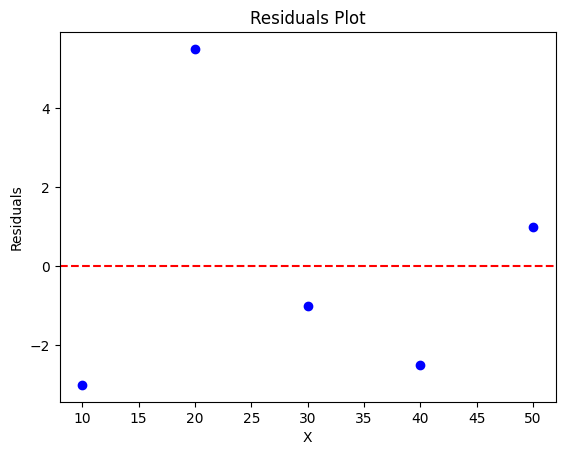

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

print("Residuals:", residuals)


#Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect **heteroscedasticity** and **multicollinearity** in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

Answer:

###To build a robust house price prediction model:

##1.   Address Heteroscedasticity

  *   Apply log transformation on dependent variable (Price).

  *   Use Weighted Least Squares (WLS) regression.

*   Apply robust standard errors to correct inference.

##2.   Address Multicollinearity

*   Calculate VIF and remove highly correlated predictors.

*   Use Principal Component Analysis (PCA) or Ridge/Lasso regression.

*   Keep only the most meaningful independent variables.

##3.   Final Steps

*   Split data into train/test sets.

*   Cross-validate the model.

*   Evaluate using metrics like R², RMSE, MAE.